In [104]:
from pathlib import Path

# Get the current notebook's directory
CURRENT_NOTEBOOK_DIR = Path().resolve()

# Assume project root is one level up from notebooks/
BASE_DIR = CURRENT_NOTEBOOK_DIR.parent.parent

# Define path to the data file
RAW_DATA_PATH = BASE_DIR / "Data_Gathering" / "City_Data" / "Gurgaon" / "Missing_value"

# # Load the data
# import pandas as pd
# df = pd.read_csv(RAW_DATA_PATH)

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# pd.set_option('display.max_columns', None)

In [107]:
df = pd.read_csv(RAW_DATA_PATH/'gurgaon_properties_missing_value_imputation.csv')

In [108]:
df.shape

(3554, 18)

In [109]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [110]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [111]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


### luxury score

<Axes: xlabel='luxury_score'>

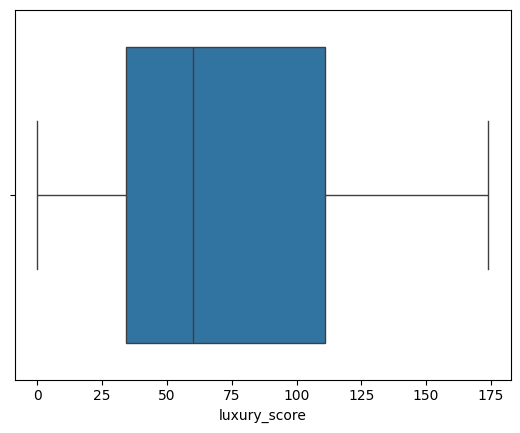

In [112]:
sns.boxplot(x = df['luxury_score'])

In [113]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [114]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [115]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High


### floorNum

<Axes: xlabel='floorNum'>

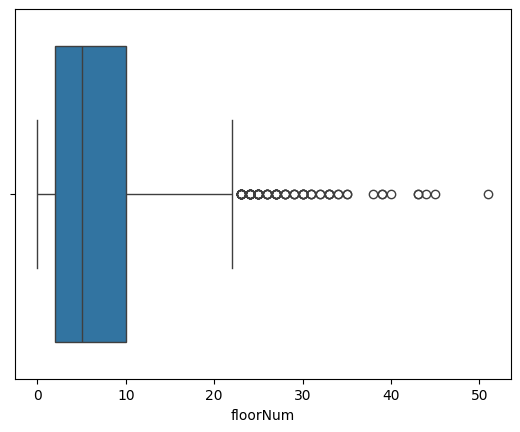

In [116]:
sns.boxplot(x = df['floorNum'])

In [117]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [118]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [119]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0,High,Mid Floor


In [120]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [121]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 36,0.82,3.0,2.0,2,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,Low Floor
1,flat,sector 89,0.95,2.0,2.0,2,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
2,flat,sohna road,0.32,2.0,2.0,1,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,High Floor
3,flat,sector 92,1.60,3.0,4.0,3+,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,High,Mid Floor
4,flat,sector 102,0.48,2.0,2.0,1,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,High,Mid Floor


In [122]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [123]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [124]:
y_label

0        0.82
1        0.95
2        0.32
3        1.60
4        0.48
        ...  
3549     0.37
3550     6.00
3551     0.60
3552    15.50
3553     1.78
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

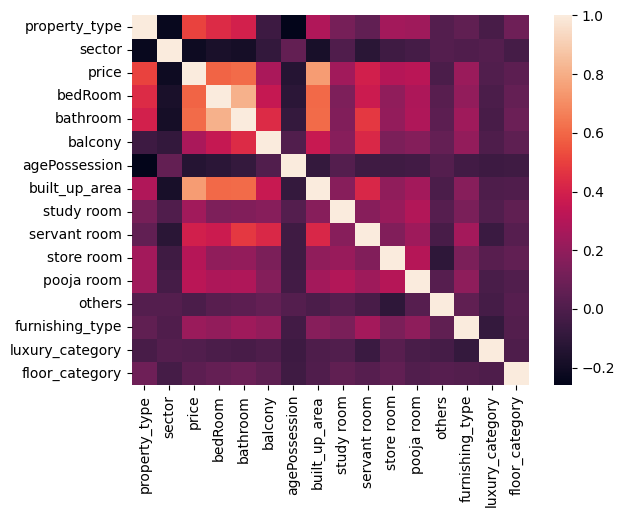

In [125]:
 sns.heatmap(data_label_encoded.corr())

In [126]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance

In [96]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650541
1,sector,0.102670
0,property_type,0.100079
3,bathroom,0.025882
2,bedRoom,0.024041
8,servant room,0.019320
5,agePossession,0.014519
4,balcony,0.012576
12,furnishing_type,0.010604
7,study room,0.008383


### Technique 3 - Gradient Boosting Feature importances

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.677773
1,sector,0.102794
0,property_type,0.098408
2,bedRoom,0.038220
3,bathroom,0.035827
8,servant room,0.023422
9,store room,0.010357
5,agePossession,0.004019
7,study room,0.003337
12,furnishing_type,0.002785


### Technique 4 - Permutation Importance

In [128]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.736026
0,property_type,0.200636
1,sector,0.178881
8,servant room,0.021018
3,bathroom,0.019884
2,bedRoom,0.018006
5,agePossession,0.004970
9,store room,0.002150
14,floor_category,0.000907
11,others,0.000792


### Technique 5 - LASSO

In [129]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.510173
0,property_type,0.713829
3,bathroom,0.275042
9,store room,0.199655
7,study room,0.171846
12,furnishing_type,0.164113
8,servant room,0.160601
10,pooja room,0.073845
13,luxury_category,0.055268
2,bedRoom,0.014170


### Technique 6 - RFE

In [130]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.648069
1,sector,0.103511
0,property_type,0.101735
2,bedRoom,0.025003
3,bathroom,0.024389
8,servant room,0.020276
5,agePossession,0.015380
4,balcony,0.013029
12,furnishing_type,0.010478
9,store room,0.009045


### Technique 7 - Linear Regression Weights

In [131]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.512629
0,property_type,0.712890
3,bathroom,0.281976
9,store room,0.204159
7,study room,0.180048
12,furnishing_type,0.173192
8,servant room,0.169605
10,pooja room,0.076893
13,luxury_category,0.066472
2,bedRoom,0.016790


### Technique 8 - SHAP

In [134]:
# !pip install shap

In [135]:
# import shap

# # Compute SHAP values using the trained Random Forest model
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_label, y_label)

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_label)

# # Summing the absolute SHAP values across all samples to get an overall measure of feature importance
# shap_sum = np.abs(shap_values).mean(axis=0)

# shap_values


In [ ]:
# fi_df8 = pd.DataFrame({
#     'feature': X_label.columns,
#     'SHAP_score': np.abs(shap_values).mean(axis=0)
# }).sort_values(by='SHAP_score', ascending=False)

# fi_df8

In [145]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [138]:
# final_fi_df


In [146]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [147]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.742078
sector             0.132752
bathroom           0.029127
bedRoom            0.028958
servant room       0.023018
agePossession      0.010732
store room         0.008267
balcony            0.007510
luxury_category    0.004246
furnishing_type    0.003887
floor_category     0.003873
pooja room         0.003152
others             0.001830
study room         0.000570
dtype: float64

In [148]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0


In [151]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [152]:
scores.mean()

np.float64(0.8193190510339333)

In [153]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [154]:
scores.mean()

np.float64(0.8196500940616491)

In [155]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [156]:
# export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [158]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2.0,2.0,1.0,3.0,532.0,0.0,0.0,0.0,2.0,2.0,0.37
3550,1.0,12.0,5.0,5.0,4.0,3.0,6228.0,1.0,1.0,0.0,0.0,1.0,6.00
3551,0.0,23.0,1.0,1.0,1.0,0.0,665.0,0.0,0.0,1.0,2.0,2.0,0.60
3552,1.0,44.0,5.0,6.0,3.0,0.0,5490.0,1.0,1.0,0.0,2.0,2.0,15.50


In [159]:
from pathlib import Path
import pandas as pd

# Get the current notebook's directory
CURRENT_NOTEBOOK_DIR = Path().resolve()

# Assume project root is one level up from notebooks/
BASE_DIR = CURRENT_NOTEBOOK_DIR.parent.parent

# Define path to the data file
RAW_DATA_PATH2 = BASE_DIR / "Data_Gathering" / "City_Data" / "Gurgaon" / "06_After_Feature_selection"

# # Load the data
# import pandas as pd
# df = pd.read_csv(RAW_DATA_PATH)

In [160]:
export_df.to_csv(RAW_DATA_PATH2/'gurgaon_properties_after_feature_selection.csv',index=False)
print("Succesfull")

Succesfull
